In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def read_data(file_paths):
    """
    Read data from multiple files and concatenate durations.
    
    Args:
        file_paths: List of file paths to read data from
        
    Returns:
        durations: Concatenated array of duration values
    """
    all_durations = []
    
    for file_path in file_paths:
        data = pd.read_csv(file_path, sep='\t', header=None, names=['timestamps', 'durations'])
        all_durations.append(data['durations'].values)
    
    return np.concatenate(all_durations)

def FreedmanDiaconis_bins(data):
    # Compute IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Freedman–Diaconis bin width
    n = len(data)
    bin_width = 2 * IQR / (n ** (1/3))

    # Number of bins
    num_bins = int((data.max() - data.min()) / bin_width)
    num_bins = max(num_bins, 1)  # ensure at least 1 bin

    print(f"Computed bin width: {bin_width:.3f}")
    print(f"Number of bins: {num_bins}")

    return num_bins

Max bin: 0.13 to 0.17 with count 12514
Value 0.14933333333333332
Error 0.0008340218787426182


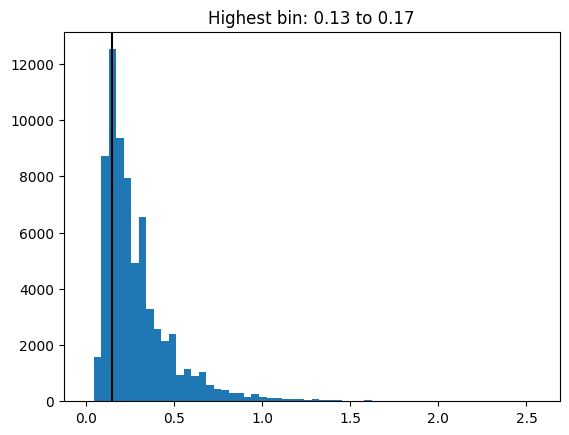

In [22]:
file_paths = ['/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration1_3_11_25/MassCalibration_data.txt','/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration2_3_11_25/MassCalibration_data.txt', '/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration3_3_11_25/MassCalibration_data.txt']

raw_data = read_data(file_paths)
mask = ~np.isnan(raw_data)
data = raw_data[mask]

num_bins = 60

# Get histogram data without plotting
counts, bin_edges = np.histogram(data, bins=num_bins)

# Find the index of the bin with the highest count
max_index = np.argmax(counts)
max_count = counts[max_index]
max_bin_start = bin_edges[max_index]
max_bin_end = bin_edges[max_index + 1]

print(f"Max bin: {max_bin_start:.2f} to {max_bin_end:.2f} with count {max_count}")
print(f"Value {(max_bin_end + max_bin_start)/2}")
print(f"Error {np.std(data) / np.sqrt(len(data))}")
plt.axvline((max_bin_end + max_bin_start)/2, color = 'black' )
# Plot the histogram
plt.hist(data, bins=num_bins)
plt.title(f'Highest bin: {max_bin_start:.2f} to {max_bin_end:.2f}')
plt.show()

In [25]:
if np.isnan(data).any():
    print("There is at least one NaN value in the data.")

There is at least one NaN value in the data.


In [25]:
2*(2.3/0.15)*(1.753*1.08*2.7)

156.760272

In [ ]:
#conversion
2*(0.98/0.1)*(1.753*1.08*2.7)

100.19026079999999

In [3]:
#mass data
file_path = '/Users/adampearl/Documents/191/GitHub/muon-lifetime-191-s25/raw_data/lifetimeMass_data.txt'
df = pd.read_csv(file_path, sep='\t', header=None)
df.columns = ['Time', 'Pulse', 'Lifetime']

mask = ~np.isnan(df)
df = df[mask]
print(np.shape(df))



(50250, 3)


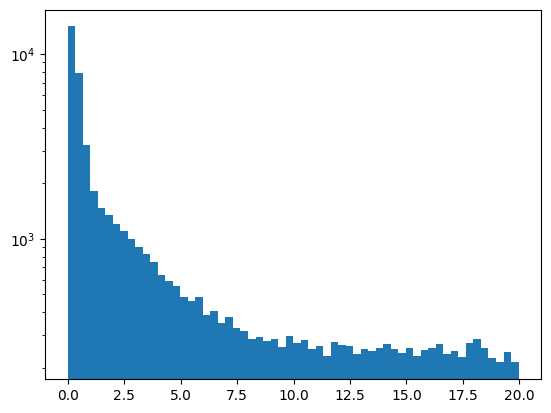

In [4]:
_ = plt.hist(df['Lifetime'] , log = True, bins = 60)

Text(0.5, 1.0, 'After lifetime f')

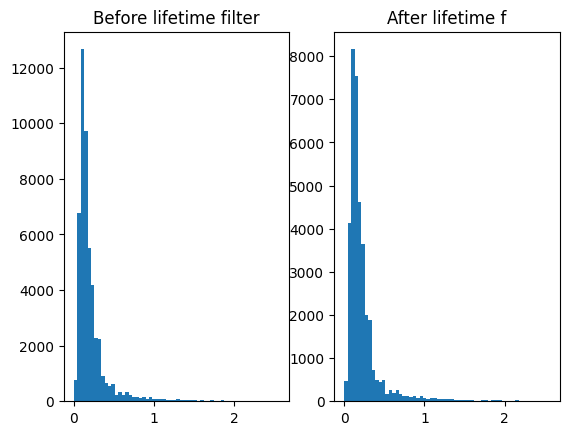

In [8]:
# filter below ten ms
fig, ax = plt.subplots(1,2)
filtered_df = df[df['Lifetime'] < 5]
q = ax[0].hist(df['Pulse'], bins = 60)
q = ax[1].hist(filtered_df['Pulse'], bins = 60)
ax[0].set_title("Before lifetime filter")
ax[1].set_title("After lifetime f")

